# Preparation

In [1]:
import tensorflow as tf
import os
import random
import cv2
import numpy as np

image_dimensions = (128, 128)
version_name = 'v1'
data_subfolder_name = '../../data'

2024-04-10 09:54:11.820020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 09:54:11.820187: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 09:54:11.861272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 09:54:11.946488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 09:54:13.339489: W tensorflow/compiler/tf2

### Optional: Clear Working Memory

In [16]:
%reset -f

# Information on the dataset

- in general, there are 6 categories:
  - anchor(0)   - "long"
  - bolt(1)     - "long"
  - nut(2)      - "stubby"
  - screw(3)    - "long"
  - washer(4)   - "stubby"
  - other(5)    - "variable"

- the minimum amount of samples is in category #6, so we will adjust to it so we have an equal amount of samples in each category for now
- the training set will be 70% of the data, the validation and test will each be 15%
  - this way we use 8855 samples, which is only 52.18% of the dataset

In [4]:
def count_files_in_folder(folder_path):
    file_count = 0
    
    for item in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, item)):
            file_count += 1
    
    return file_count

folder_path = f'{data_subfolder_name}/0'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/1'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/2'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/3'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/4'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/5'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

Number of files in the folder: 1676
Number of files in the folder: 6077
Number of files in the folder: 1860
Number of files in the folder: 4079
Number of files in the folder: 1802
Number of files in the folder: 1476


### Optional: Load and Create the Dataset

In [2]:
# Largest:
train_set_size = 6199
validation_set_size = 1328
test_set_size = 1328

# train_set_size = 3100
# validation_set_size = 664
# test_set_size = 664

def create_dataset_slice(count_train, count_validation, count_test):
    train_data = []
    validation_data = []
    test_data = []
    
    for i in range(0, 6):
        print('processing class... ', i)
        directory = f'{data_subfolder_name}/{str(i)}'
        files = os.listdir(directory)
        random.shuffle(files)
                
        train_files = files[:count_train]
        validation_files = files[count_train:count_train+count_validation]
        test_files = files[count_train+count_validation:count_train+count_validation+count_test]
        
        for file in train_files:
            new_path = f'{data_subfolder_name}/{str(i)}/{file.replace(":", "_")}'
            item_img = cv2.imread(new_path)
            item_img = cv2.cvtColor(item_img, cv2.COLOR_BGR2RGB)
            res = cv2.resize(item_img, dsize=image_dimensions, interpolation=cv2.INTER_CUBIC)
            item_label = i
            train_data.append((res, item_label))
            
        for file in validation_files:
            new_path = f'{data_subfolder_name}/{str(i)}/{file.replace(":", "_")}'
            item_img = cv2.imread(new_path)
            item_img = cv2.cvtColor(item_img, cv2.COLOR_BGR2RGB)
            res = cv2.resize(item_img, dsize=image_dimensions, interpolation=cv2.INTER_CUBIC)
            item_label = i
            validation_data.append((res, item_label))
            
        for file in test_files:
            new_path = f'{data_subfolder_name}/{str(i)}/{file.replace(":", "_")}'
            item_img = cv2.imread(new_path)
            item_img = cv2.cvtColor(item_img, cv2.COLOR_BGR2RGB)
            res = cv2.resize(item_img, dsize=image_dimensions, interpolation=cv2.INTER_CUBIC)
            item_label = i
            test_data.append((res, item_label))
    
    random.shuffle(train_data)
    random.shuffle(validation_data)
    random.shuffle(test_data)

    return train_data, validation_data, test_data

train_set, validation_set, test_set = create_dataset_slice(train_set_size//6, validation_set_size//6, test_set_size//6)
print('Done!')

# (train_images, train_labels) = zip(*train_set)
# (validation_images, validation_labels) = zip(*validation_set)
# (test_images, test_labels) = zip(*test_set)

# train_images = np.array(train_images)
# train_labels = np.array(train_labels)
# validation_images = np.array(validation_images)
# validation_labels = np.array(validation_labels)
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

processing class...  0
processing class...  1
processing class...  2
processing class...  3
processing class...  4
processing class...  5


### Optional: Save Training Data

- Optionally, we can save our training, test and validation data into a file to load for later
- Saved in training_presets/filename.pkl

In [3]:
import pickle

subfolder_name = '128_6199'

training_set_v1_file_path = f"./training_presets/{subfolder_name}/training_set_{version_name}.pkl"
validation_set_v1_file_path = f"./training_presets/{subfolder_name}/validation_set_{version_name}.pkl"
test_set_v1_file_path = f"./training_presets/{subfolder_name}/test_set_{version_name}.pkl"

with open(training_set_v1_file_path, "wb") as file:
    print('Saving training set...')
    pickle.dump(train_set, file)
    print('Done!')

with open(validation_set_v1_file_path, "wb") as file:
    print('Saving validation set...')
    pickle.dump(validation_set, file)
    print('Done!')

with open(test_set_v1_file_path, "wb") as file:
    print('Saving test set...')
    pickle.dump(test_set, file)
    print('Done!')

Saving training set...
Done!
Saving validation set...
Done!
Saving test set...
Done!


### Optional: Load Training Data

- Optionally, we can load our training, test and validation data from a file we previously created
- Saved in training_presets/filename.pkl

In [2]:
import pickle

subfolder_name = '128_6199'

training_set_v1_file_path = f"./training_presets/{subfolder_name}/training_set_{version_name}.pkl"
validation_set_v1_file_path = f"./training_presets/{subfolder_name}/validation_set_{version_name}.pkl"
test_set_v1_file_path = f"./training_presets/{subfolder_name}/test_set_{version_name}.pkl"

with open(training_set_v1_file_path, "rb") as file:
  print('Loading training set...')
  train_set = pickle.load(file)
  print('Done!')
  
with open(validation_set_v1_file_path, "rb") as file:
  print('Loading validation set...')
  validation_set = pickle.load(file)
  print('Done!')
  
with open(test_set_v1_file_path, "rb") as file:
  print('Loading test set...')
  test_set = pickle.load(file)
  print('Done!')

Loading training set...
Done!
Loading validation set...
Done!
Loading test set...
Done!


# Create dataset from loaded data

In [3]:
(train_images, train_labels) = zip(*train_set)
(validation_images, validation_labels) = zip(*validation_set)
(test_images, test_labels) = zip(*test_set)

del train_set, validation_set, test_set

train_images = np.array(train_images)
train_labels = np.array(train_labels)
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

### Optional: View Data

- Optionally, we can preview our training, test and validation data as images

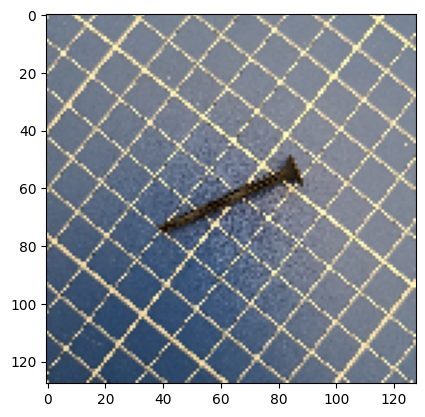

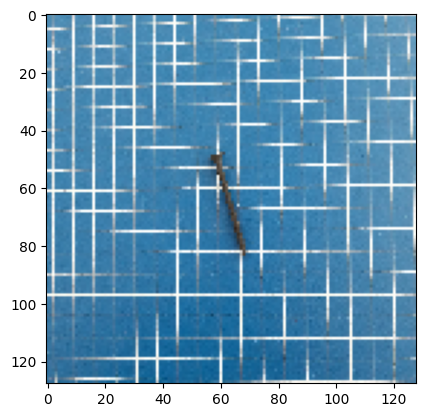

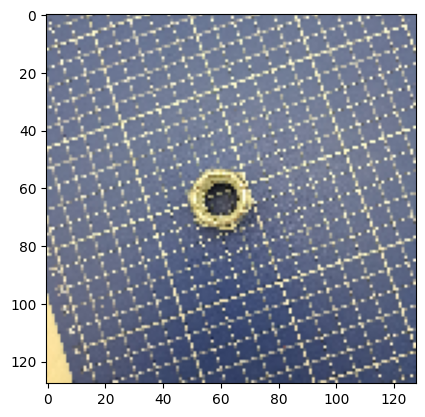

In [4]:
import matplotlib.pyplot as plt

# print(train_images[random.randint(0, len(train_images))])

plt.imshow(train_images[random.randint(0, len(train_images))]); plt.show()
plt.imshow(validation_images[random.randint(0, len(validation_images))]); plt.show()
plt.imshow(test_images[random.randint(0, len(test_images))]); plt.show()

# Create TF Dataset

In [5]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
del train_images, train_labels

2024-03-17 16:26:10.130084: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-17 16:26:10.269994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-17 16:26:10.270246: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)).batch(batch_size)
del validation_images, validation_labels

In [7]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)
del test_images, test_labels

In [ ]:
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)
    
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)
    
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)

# Define Convolutional Neural Network Architecture

In [6]:
from tensorflow import keras
from keras import layers
import gc

gc.collect() 
keras.backend.clear_session()

In [7]:
inputs = keras.Input(shape=(image_dimensions[0], image_dimensions[1], 3))
x = layers.Rescaling(1./255)(inputs)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

x = data_augmentation(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)  
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x) # 256
x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# x = layers.BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)  

outputs = layers.Dense(6, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

2024-04-10 10:07:35.308617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 10:07:35.521288: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 10:07:35.521858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                          

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer=keras.optimizers.Adam(),
            metrics=["accuracy"])

# Training

- Train on the data and view training results using matplotlib 

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f'fastener_net_{version_name}.keras',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/100


2024-03-17 16:16:44.217601: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 124.03MiB (rounded to 130056192)requested by op model/batch_normalization/FusedBatchNormV3
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-03-17 16:16:44.217632: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-03-17 16:16:44.217642: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 107, Chunks in use: 107. 26.8KiB allocated for chunks. 26.8KiB in use in bin. 9.1KiB client-requested in use in bin.
2024-03-17 16:16:44.217648: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 24, Chunks in use: 23. 12.8KiB allocated for chunks. 12.0KiB in use in bin. 11.5KiB client-requested

RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL ResourceExhaustedError REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/framework/errors_impl.py(377): __init__
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/execute.py(53): quick_execute
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/context.py(1486): call_function
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(251): call_flat
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(216): call_preflattened
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/concrete_function.py(1323): _call_flat
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/tracing_compilation.py(139): call_function
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(905): _call
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(832): __call__
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/keras/src/engine/training.py(1807): fit
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py(65): error_handler
  /tmp/ipykernel_31455/2265187169.py(8): <module>
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3526): run_code
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3466): run_ast_nodes
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3284): run_cell_async
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3079): _run_cell
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py(3024): run_cell
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/zmqshell.py(549): run_cell
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/ipkernel.py(426): do_execute
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/kernelbase.py(758): execute_request
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/kernelbase.py(418): dispatch_shell
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/kernelbase.py(513): process_one
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/kernelbase.py(524): dispatch_queue
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/asyncio/events.py(80): _run
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/asyncio/base_events.py(1922): _run_once
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/asyncio/base_events.py(607): run_forever
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tornado/platform/asyncio.py(195): start
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel/kernelapp.py(737): start
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/traitlets/config/application.py(992): launch_instance
  /home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/ipykernel_launcher.py(17): <module>
  <frozen runpy>(88): _run_code
  <frozen runpy>(198): _run_module_as_main


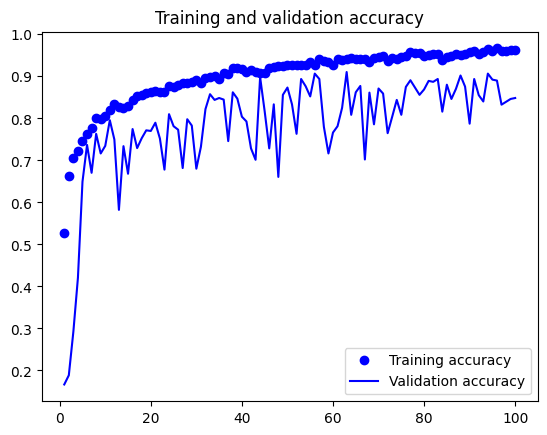

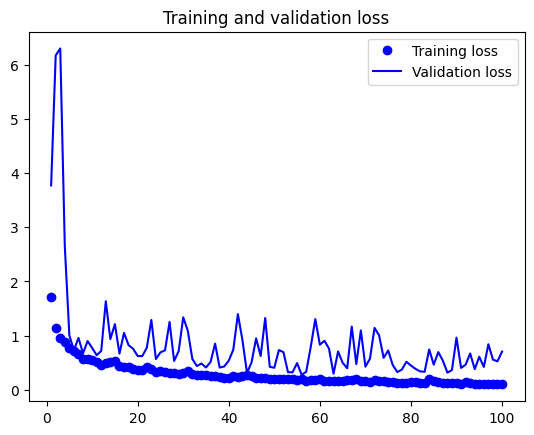

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.savefig(f'accuracy_history_{version_name}.png')
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.savefig(f'loss_history_{version_name}.png')
plt.show()

# Testing

- Test the performance of the model on the test data 

In [9]:
test_model = keras.models.load_model("fastener_net_v1.keras")
evaluation_results = test_model.evaluate(test_dataset)
print(f"Test accuracy: {evaluation_results[1]:.3f}")

2024-03-17 16:26:33.285414: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


21/21 [==============================] - 3s 57ms/step - loss: 0.2659 - accuracy: 0.9178
Test accuracy: 0.918


In [10]:
longs = [0, 1, 3]
shorts = [2, 4]
varibles = [5]

pred = test_model.predict(test_dataset)
pred_labels = np.argmax(pred, axis=1)

test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# print(test_labels)
# print(pred_labels)

count = 0
count_between = 0
count_inside = 0
count_variable = 0
for i in range(0, len(test_labels)):
  if test_labels[i] != pred_labels[i]:
    # print(f"Real label: {test_labels[i]}, Predicted label: {pred_labels[i]}")
    if(test_labels[i] in longs and pred_labels[i] in shorts or test_labels[i] in shorts and pred_labels[i] in longs):
      # print("Missed between longs and shorts")
      count_between += 1
    elif(test_labels[i] in longs and pred_labels[i] in longs or test_labels[i] in shorts and pred_labels[i] in shorts):
      # print("Missed inside longs or shorts")
      count_inside += 1
    else:
      # print("Variable situation")
      count_variable += 1
    count += 1
    
print(f"Errors between meta-categories: {count_between}, {count_between/count*100:.2f}% of total errors")
print(f"Errors inside meta-categories: {count_inside}, {count_inside/count*100:.2f}% of total errors")
print(f"Variable situation errors: {count_variable}, {count_variable/count*100:.2f}% of total errors")
print(f"Total errors: {count} out of {len(test_labels)}")

21/21 [==============================] - 0s 18ms/step
Errors between meta-categories: 2, 1.83% of total errors
Errors inside meta-categories: 57, 52.29% of total errors
Variable situation errors: 50, 45.87% of total errors
Total errors: 109 out of 1326
